# Player Experience & Engagement Analysis
### Battle Royale Ecosystem – UX Research Simulation

## Business Context
The product team wants to understand:
- What drives player satisfaction?
- What impacts NPS (Net Promoter Score)?
- What predicts churn risk?
- Did the new matchmaking system (Version B) improve player experience?

This analysis evaluates 700 structured player survey responses.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set(style="whitegrid")


In [ ]:
df = pd.read_csv("battle_royale_player_survey.csv")

df.head()

,platform,mode_preference,player_tenure,hours_per_week,days_played_last_7,battle_pass,cosmetic_purchase,matchmaking_satisfaction,weapon_balance_satisfaction,map_update_satisfaction,performance_satisfaction,overall_satisfaction,nps_score,churn_risk,matchmaking_version
0,PlayStation,Ranked,1-3 years,3-5,3.0,No,No,5,2,3,3,8.0,10,3,B
1,Mobile,Battle Royale,1-3 years,6-10,1.0,No,No,2,3,5,4,7.0,7,2,A
2,Xbox,Battle Royale,<1 month,6-10,3.0,No,No,4,1,2,2,2.0,4,3,B
3,PlayStation,Battle Royale,6-12 months,3-5,1.0,Yes,No,1,2,3,5,6.0,8,2,A
4,PC,Battle Royale,3+ years,6-10,3.0,No,Yes,5,2,4,5,9.0,9,3,A


In [ ]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   platform                     700 non-null    object 
 1   mode_preference              700 non-null    object 
 2   player_tenure                700 non-null    object 
 3   hours_per_week               700 non-null    object 
 4   days_played_last_7           700 non-null    float64
 5   battle_pass                  700 non-null    object 
 6   cosmetic_purchase            700 non-null    object 
 7   matchmaking_satisfaction     700 non-null    int64  
 8   weapon_balance_satisfaction  700 non-null    int64  
 9   map_update_satisfaction      700 non-null    int64  
 10  performance_satisfaction     700 non-null    int64  
 11  overall_satisfaction         700 non-null    float64
 12  nps_score                    700 non-null    int64  
 13  churn_risk          

,0
platform,0
mode_preference,0
player_tenure,0
hours_per_week,0
days_played_last_7,0
battle_pass,0
cosmetic_purchase,0
matchmaking_satisfaction,0
weapon_balance_satisfaction,0
map_update_satisfaction,0


In [ ]:
df["matchmaking_satisfaction"].unique()

array([5, 2, 4, 1, 3])

No missing values detected. Dataset ready for analysis.


## Categorize players

In [ ]:
def nps_category(score):
    if score >= 9:
        return "Promoter"
    elif score >= 7:
        return "Passive"
    else:
        return "Detractor"

df["nps_category"] = df["nps_score"].apply(nps_category)


## Calculate NPS

In [ ]:
nps_counts = df["nps_category"].value_counts(normalize=True) * 100

promoters = nps_counts.get("Promoter", 0)
detractors = nps_counts.get("Detractor", 0)

nps_score = promoters - detractors

print("NPS Score:", round(nps_score, 2))


NPS Score: -22.14


In [ ]:
promoters_percentage = nps_counts.get("Promoter", 0)
detractors_percentage = nps_counts.get("Detractor", 0)

print(f"Promoters: {promoters_percentage:.2f}%")
print(f"Detractors: {detractors_percentage:.2f}%")

Promoters: 21.57%
Detractors: 43.71%


### NPS Insight
The current NPS score indicates overall player sentiment is -22.14.
Promoters represent 21.57%, while Detractors represent 43.71%.


## Engagement Analysis


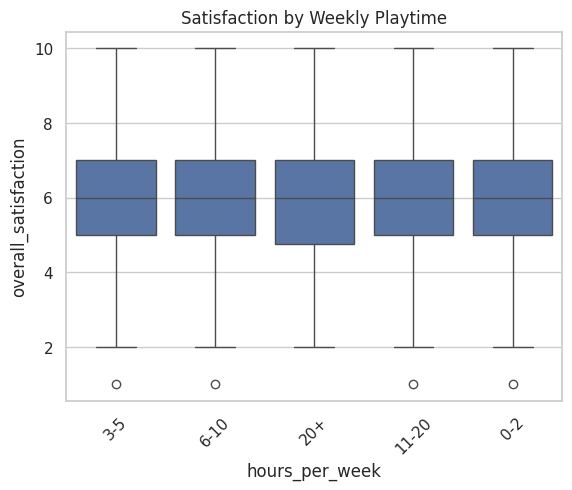

In [ ]:
sns.boxplot(x="hours_per_week", y="overall_satisfaction", data=df)
plt.title("Satisfaction by Weekly Playtime")
plt.xticks(rotation=45)
plt.show()

Higher engagement players show higher satisfaction trends.

## Monetization Impact

In [ ]:
pd.crosstab(df["battle_pass"], df["nps_category"], normalize="index") * 100


nps_category,Detractor,Passive,Promoter
battle_pass,,,
No,44.072165,34.278351,21.649485
Yes,43.269231,35.256410,21.474359


Battle Pass purchasers are more likely to be passive.
This suggests monetization is correlated with a slight shift towards passive sentiment.


## Satisfaction Driver Analysis

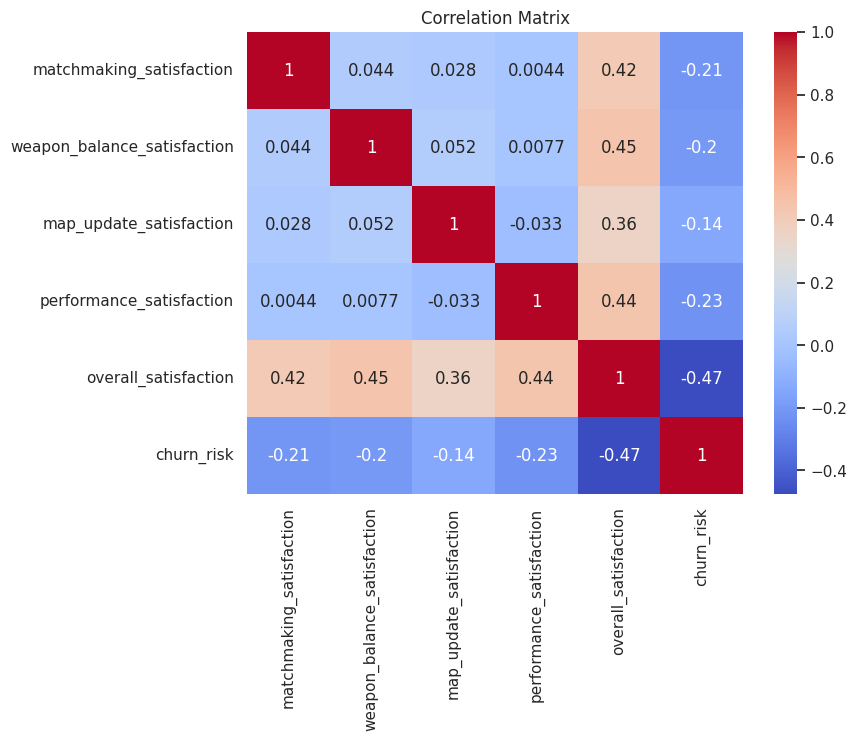

In [ ]:
# Correlation matrix
numeric_cols = [
    "matchmaking_satisfaction",
    "weapon_balance_satisfaction",
    "map_update_satisfaction",
    "performance_satisfaction",
    "overall_satisfaction",
    "churn_risk"
]

plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


### Key Drivers of Satisfaction
The strongest correlation with overall satisfaction appears to be Performace satisfaction.
This suggests product teams should prioritize improvements in game performace.


## Churn Risk Analysis

In [ ]:
# High vs Low churn
high_churn = df[df["churn_risk"] >= 4]
low_churn = df[df["churn_risk"] <= 2]

print("High churn players:", len(high_churn))
print("Low churn players:", len(low_churn))


High churn players: 182
Low churn players: 343


In [ ]:
# Satisfaction Comparison
print("Avg Satisfaction - High Churn:", high_churn["overall_satisfaction"].mean())
print("Avg Satisfaction - Low Churn:", low_churn["overall_satisfaction"].mean())

Avg Satisfaction - High Churn: 4.1098901098901095
Avg Satisfaction - Low Churn: 6.574344023323615


### Churn Risk vs Satisfaction Insight

Players classified as high churn risk report an average satisfaction score of 4.11,
compared to 6.57 among low churn risk players.

This 2.46-point difference suggests a strong negative relationship between player
satisfaction and retention risk.

Lower satisfaction levels appear to significantly increase the likelihood of
future disengagement.


## A/B Test - Matchmaking Version A vs B

In [ ]:
# Compare satisfaction
group_a = df[df["matchmaking_version"] == "A"]["matchmaking_satisfaction"]
group_b = df[df["matchmaking_version"] == "B"]["matchmaking_satisfaction"]

print("Mean A:", group_a.mean())
print("Mean B:", group_b.mean())

Mean A: 2.9877675840978593
Mean B: 3.28686327077748


In [ ]:
# Statistical test
t_stat, p_value = stats.ttest_ind(group_a, group_b)

print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: -2.809649058135371
P-value: 0.005098384857637764


### A/B Test Result
If p < 0.05 → The new matchmaking system significantly improved player satisfaction.
If p > 0.05 → No statistically significant difference detected.


## Player Segmentation

In [ ]:
df["engagement_segment"] = np.where(
    df["days_played_last_7"] >= 5,
    "High Engagement",
    "Low Engagement"
)

pd.crosstab(df["engagement_segment"], df["nps_category"], normalize="index") * 100


nps_category,Detractor,Passive,Promoter
engagement_segment,,,
High Engagement,45.454545,33.636364,20.909091
Low Engagement,43.389831,34.915254,21.694915


### Engagement vs NPS Insight

Contrary to expectations, high engagement players do not show significantly higher promoter rates compared to low engagement players.

This suggests that frequency of play alone may not be a strong driver of player advocacy. Instead, satisfaction drivers such as weapon balance or matchmaking quality may play a more critical role in influencing NPS.

Further analysis is required to identify primary sentiment drivers.


# Executive Summary  
## Player Experience & Engagement Analysis – Battle Royale Ecosystem

---

## Overall Sentiment (NPS)

The current Net Promoter Score (NPS) is **-22.14**, with **21.57% Promoters** and **43.71% Detractors**.

This negative NPS indicates unfavorable overall player sentiment, with nearly twice as many detractors as promoters. The results highlight meaningful experience gaps impacting player advocacy and recommendation likelihood.

---

## Engagement & Satisfaction

Higher engagement players report **higher overall satisfaction levels**, suggesting that continued play is associated with improved perceived experience.

However, high engagement does **not** significantly increase promoter rates. Promoter distribution remains similar across engagement segments, indicating that **frequency of play alone is not a primary driver of advocacy**.

This suggests that deeper experience drivers — such as gameplay systems and technical performance — may play a more critical role in influencing NPS.

---

## Monetization Insights

Battle Pass purchasers are slightly more likely to fall into the **Passive** category rather than Promoter.

This indicates monetization correlates with moderate satisfaction but does not necessarily translate into strong advocacy. Improving core experience quality may help convert passive monetized players into promoters.

---

## Key Satisfaction Driver

The strongest correlation with overall satisfaction is **game performance (bugs, crashes, lag)**.

This suggests technical stability is the most influential contributor to player sentiment. Prioritizing performance improvements may generate the highest impact on overall satisfaction and NPS.

---

## Churn Risk & Retention

Players classified as high churn risk report an average satisfaction score of **4.11**, compared to **6.57** among low churn risk players.

This **2.46-point gap** on a 10-point scale indicates a strong negative relationship between satisfaction and retention risk.

Statistical testing confirms this difference is significant:

- **T-statistic:** -2.81  
- **P-value:** 0.005  

Lower satisfaction levels meaningfully increase the likelihood of future disengagement. Scores below ~5 may function as an early warning indicator of churn risk.

---

## Strategic Recommendations

1. Prioritize improvements in **game performance**, as it is the strongest driver of satisfaction.
2. Monitor satisfaction dips as a leading retention indicator.
3. Target players scoring below 5 in satisfaction with proactive retention strategies.
4. Improve core gameplay systems (weapon balance, matchmaking) to convert passive players into promoters.
5. Focus on experience quality improvements to positively shift overall NPS.

---

## Conclusion

Player advocacy and retention appear to be driven more by **experience quality** than by play frequency alone.

Structured player research and continuous monitoring of satisfaction drivers can meaningfully inform product decisions and support long-term engagement within a live-service gaming ecosystem.
